# Data Preparation

In [1]:
# Importing necessary packages
import os
import h5py
import random

import matplotlib.pyplot as plt
import seaborn as sns

## Extracting all ligands and proteins from Grechishnikova BindingDB

In [2]:
data_path = '/home/iit/DGGNP/data/bindingdb/'

### Analysing the proteins

In [3]:
print('Train datasets details:')

d1_tr_prots = []
d2_tr_prots = []
d3_tr_prots = []
d4_tr_prots = []
d5_tr_prots = []

with open(data_path+'train_dataset/train_4_org_1042_104/proteins_train_4_org_corrected') as f:
    for line in f:
        d1_tr_prots.append(line)
print('Dataset 1 proteins count =', len(set(d1_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1000_112/proteins_train_4_org_corrected') as f:
    for line in f:
        d2_tr_prots.append(line)
print('Dataset 2 proteins count =', len(set(d2_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1004_122/proteins_train_4_org_corrected') as f:
    for line in f:
        d3_tr_prots.append(line)
print('Dataset 3 proteins count =', len(set(d3_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1002_103/proteins_train_4_org_corrected') as f:
    for line in f:
        d4_tr_prots.append(line)
print('Dataset 4 proteins count =', len(set(d4_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1036_124/proteins_train_4_org_corrected') as f:
    for line in f:
        d5_tr_prots.append(line)
print('Dataset 5 proteins count =', len(set(d5_tr_prots)))

Train datasets details:
Dataset 1 proteins count = 1514
Dataset 2 proteins count = 1000
Dataset 3 proteins count = 1004
Dataset 4 proteins count = 1002
Dataset 5 proteins count = 1036


Dataset 1 actually has 1514 proteins in train dataset, whereas in Grechishnikova paper it is given as 1042. All other datasets are correct.

In [4]:
print('Test datasets details:')

d1_te_prots = []
d2_te_prots = []
d3_te_prots = []
d4_te_prots = []
d5_te_prots = []

with open(data_path+'test_dataset/test_4_org_1042_104/proteins_test_4_org_corrected') as f:
    for line in f:
        d1_te_prots.append(line)
print('Dataset 1 proteins count =', len(set(d1_te_prots)))

with open(data_path+'test_dataset/test_4_org_1000_112/proteins_test_4_org_corrected') as f:
    for line in f:
        d2_te_prots.append(line)
print('Dataset 2 proteins count =', len(set(d2_te_prots)))

with open(data_path+'test_dataset/test_4_org_1004_122/proteins_test_4_org_corrected') as f:
    for line in f:
        d3_te_prots.append(line)
print('Dataset 3 proteins count =', len(set(d3_te_prots)))

with open(data_path+'test_dataset/test_4_org_1002_103/proteins_test_4_org_corrected') as f:
    for line in f:
        d4_te_prots.append(line)
print('Dataset 4 proteins count =', len(set(d4_te_prots)))

with open(data_path+'test_dataset/test_4_org_1036_124/proteins_test_4_org_corrected') as f:
    for line in f:
        d5_te_prots.append(line)
print('Dataset 5 proteins count =', len(set(d5_te_prots)))

Test datasets details:
Dataset 1 proteins count = 99
Dataset 2 proteins count = 112
Dataset 3 proteins count = 122
Dataset 4 proteins count = 103
Dataset 5 proteins count = 124


Dataset 1 actually has 99 proteins in test dataset, whereas in Grechishnikova paper it is given as 104. All other datasets are correct.

We need to fix Dataset 1.

In [5]:
print(len(set(d1_tr_prots + d1_te_prots)))
print(len(set(d2_tr_prots + d2_te_prots)))
print(len(set(d3_tr_prots + d3_te_prots)))
print(len(set(d4_tr_prots + d4_te_prots)))
print(len(set(d5_tr_prots + d5_te_prots)))

1613
1112
1126
1105
1160


In [6]:
print(len(set(d1_te_prots + d2_te_prots)))
print(len(set(d1_te_prots + d3_te_prots)))
print(len(set(d1_te_prots + d4_te_prots)))
print(len(set(d1_te_prots + d5_te_prots)))

204
216
197
218


In [7]:
d2345_tr_prots = set(d2_tr_prots + d3_tr_prots + d4_tr_prots + d5_tr_prots)
d1_tr_uprots_only = list(set(d1_tr_prots) - d2345_tr_prots)
len(d1_tr_uprots_only)

456

In [8]:
d1_tr_uprots_other = list(set(d1_tr_prots)-set(d1_tr_uprots_only))
len(d1_tr_uprots_other)

1058

In [9]:
random.seed(17)

d1_tr_uprots = d1_tr_uprots_only + random.sample(d1_tr_uprots_other, k=586)
len(d1_tr_uprots)

1042

In [10]:
len(set(d1_tr_uprots+d1_te_prots))

1141

In [11]:
d2345_te_prots = set(d2_te_prots + d3_te_prots + d4_te_prots + d5_te_prots + d2_tr_prots + d3_tr_prots + d4_tr_prots + d5_tr_prots) - set(d1_tr_uprots)
d1_te_uprots_only = list(set(d1_te_prots) - d2345_te_prots)
len(d1_te_uprots_only)

22

In [12]:
d2345_te_prots_only = list(set(d2345_te_prots) - set(d1_te_uprots_only))
len(d2345_te_prots_only)

549

In [13]:
d1_te_uprots = d1_te_uprots_only + random.sample(d2345_te_prots_only, k=104-len(d1_te_uprots_only))
len(d1_te_uprots)

104

In [14]:
len(set(d1_tr_uprots+d1_te_uprots))

1146

We fixed Dataset 1. Now we'll save the unique proteins for all 5 datasets.

In [15]:
# Saving train datasets

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_proteins.txt', 'w+') as f:
    for prot in d1_tr_uprots:
        f.write(prot)
print('Dataset 1 train saved.')

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_proteins.txt', 'w+') as f:
    for prot in set(d2_tr_prots):
        f.write(prot)
print('Dataset 2 train saved.')

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_proteins.txt', 'w+') as f:
    for prot in set(d3_tr_prots):
        f.write(prot)
print('Dataset 3 train saved.')

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_proteins.txt', 'w+') as f:
    for prot in set(d4_tr_prots):
        f.write(prot)
print('Dataset 4 train saved.')

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_proteins.txt', 'w+') as f:
    for prot in set(d5_tr_prots):
        f.write(prot)
print('Dataset 5 train saved.')

Dataset 1 train saved.
Dataset 2 train saved.
Dataset 3 train saved.
Dataset 4 train saved.
Dataset 5 train saved.


In [16]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins.txt', 'w+') as f:
    for prot in d1_te_uprots:
        f.write(prot)
print('Dataset 1 test saved.')

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins.txt', 'w+') as f:
    for prot in set(d2_te_prots):
        f.write(prot)
print('Dataset 2 test saved.')

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins.txt', 'w+') as f:
    for prot in set(d3_te_prots):
        f.write(prot)
print('Dataset 3 test saved.')

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins.txt', 'w+') as f:
    for prot in set(d4_te_prots):
        f.write(prot)
print('Dataset 4 test saved.')

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins.txt', 'w+') as f:
    for prot in set(d5_te_prots):
        f.write(prot)
print('Dataset 5 test saved.')

Dataset 1 test saved.
Dataset 2 test saved.
Dataset 3 test saved.
Dataset 4 test saved.
Dataset 5 test saved.


Let's check if everything is in order.

In [17]:
print('Train datasets details:')

d1_tr_uprots = []
d2_tr_uprots = []
d3_tr_uprots = []
d4_tr_uprots = []
d5_tr_uprots = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_proteins.txt') as f:
    for line in f:
        d1_tr_uprots.append(line)
print('Dataset 1 proteins count =', len(set(d1_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_proteins.txt') as f:
    for line in f:
        d2_tr_uprots.append(line)
print('Dataset 2 proteins count =', len(set(d2_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_proteins.txt') as f:
    for line in f:
        d3_tr_uprots.append(line)
print('Dataset 3 proteins count =', len(set(d3_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_proteins.txt') as f:
    for line in f:
        d4_tr_uprots.append(line)
print('Dataset 4 proteins count =', len(set(d4_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_proteins.txt') as f:
    for line in f:
        d5_tr_uprots.append(line)
print('Dataset 5 proteins count =', len(set(d5_tr_uprots)))

Train datasets details:
Dataset 1 proteins count = 1042
Dataset 2 proteins count = 1000
Dataset 3 proteins count = 1004
Dataset 4 proteins count = 1002
Dataset 5 proteins count = 1036


In [18]:
print('Test datasets details:')

d1_te_uprots = []
d2_te_uprots = []
d3_te_uprots = []
d4_te_uprots = []
d5_te_uprots = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins.txt') as f:
    for line in f:
        d1_te_uprots.append(line)
print('Dataset 1 proteins count =', len(set(d1_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins.txt') as f:
    for line in f:
        d2_te_uprots.append(line)
print('Dataset 2 proteins count =', len(set(d2_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins.txt') as f:
    for line in f:
        d3_te_uprots.append(line)
print('Dataset 3 proteins count =', len(set(d3_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins.txt') as f:
    for line in f:
        d4_te_uprots.append(line)
print('Dataset 4 proteins count =', len(set(d4_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins.txt') as f:
    for line in f:
        d5_te_uprots.append(line)
print('Dataset 5 proteins count =', len(set(d5_te_uprots)))

Test datasets details:
Dataset 1 proteins count = 104
Dataset 2 proteins count = 112
Dataset 3 proteins count = 122
Dataset 4 proteins count = 103
Dataset 5 proteins count = 124


In [19]:
print(len(set(d1_tr_uprots + d1_te_uprots)))
print(len(set(d2_tr_uprots + d2_te_uprots)))
print(len(set(d3_tr_uprots + d3_te_uprots)))
print(len(set(d4_tr_uprots + d4_te_uprots)))
print(len(set(d5_tr_uprots + d5_te_uprots)))

1146
1112
1126
1105
1160


### Checking Needleman-Wunsch pairwise sequence similarity of proteins

We will first store each protein as individual file to give as input to the emboss needle software.

In [20]:
# Dataset 1 proteins (train+test)
for i, protein in enumerate(d1_tr_uprots):
    with open(data_path+f'train_dataset/train_4_org_1042_104/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        
for i, protein in enumerate(d1_te_uprots):
    with open(data_path+f'test_dataset/test_4_org_1042_104/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        

# Dataset 2 proteins (train+test)
for i, protein in enumerate(d2_tr_uprots):
    with open(data_path+f'train_dataset/train_4_org_1000_112/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        
for i, protein in enumerate(d2_te_uprots):
    with open(data_path+f'test_dataset/test_4_org_1000_112/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        

# Dataset 3 proteins (train+test)
for i, protein in enumerate(d3_tr_uprots):
    with open(data_path+f'train_dataset/train_4_org_1004_122/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        
for i, protein in enumerate(d3_te_uprots):
    with open(data_path+f'test_dataset/test_4_org_1004_122/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        

# Dataset 4 proteins (train+test)
for i, protein in enumerate(d4_tr_uprots):
    with open(data_path+f'train_dataset/train_4_org_1002_103/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        
for i, protein in enumerate(d4_te_uprots):
    with open(data_path+f'test_dataset/test_4_org_1002_103/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        

# Dataset 5 proteins (train+test)
for i, protein in enumerate(d5_tr_uprots):
    with open(data_path+f'train_dataset/train_4_org_1036_124/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))
        
for i, protein in enumerate(d5_te_uprots):
    with open(data_path+f'test_dataset/test_4_org_1036_124/protein{i+1}.fasta', 'w+') as fw:
        fw.write(line.replace(' ', ''))

In [21]:
ds_name = ['1042_104', '1000_112', '1004_122', '1002_103', '1036_124']
ds_len = [(1042, 104), (1000, 112), (1004, 122), (1002, 103), (1036, 124)]

First we compute pairwise similarities between train and test proteins for each dataset.

In [22]:
os.system(f'mkdir {data_path}needle_outputs')

0

In [ ]:
os.system(f'mkdir {data_path}needle_outputs/train-test')

for i in range(5):
    for p1 in range(1, ds_len[i][0]+1):
        for p2 in range(1, ds_len[i][1]+1):
            os.system(f'needle {data_path}train_dataset/train_4_org_{ds_name[i]}/protein{p1}.fasta {data_path}test_dataset/test_4_org_{ds_name[i]}/protein{p2}.fasta stdout -gapopen 10.0 -gapextend 0.5 >> {data_path}needle_outputs/train-test/ds{i+1}_proteins_{p1}_{p2}.txt')

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Next we compute pairwise similarities within train proteins for each dataset.

In [12]:
os.system(f'mkdir {data_path}needle_outputs/within_train')

for i in range(5):
    for p1 in range(1, ds_len[i][0]+1):
        for p2 in range(1, ds_len[i][0]+1):
            os.system(f'needle {data_path}train_dataset/train_4_org_{ds_name[i]}/protein{p1}.fasta {data_path}train_dataset/train_4_org_{ds_name[i]}/protein{p2}.fasta stdout -gapopen 10.0 -gapextend 0.5 >> {data_path}needle_outputs/within_train/ds{i+1}_proteins_{p1}_{p2}.txt')

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Finally we compute pairwise similarities within test proteins for each dataset.

In [12]:
os.system(f'mkdir {data_path}needle_outputs/within_test')

for i in range(5):
    for p1 in range(1, ds_len[i][1]+1):
        for p2 in range(1, ds_len[i][1]+1):
            os.system(f'needle {data_path}test_dataset/test_4_org_{ds_name[i]}/protein{p1}.fasta {data_path}test_dataset/test_4_org_{ds_name[i]}/protein{p2}.fasta stdout -gapopen 10.0 -gapextend 0.5 >> {data_path}needle_outputs/within_test/ds{i+1}_proteins_{p1}_{p2}.txt')

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignment of two sequences
Needleman-Wunsch global alignme

Now we'll plot the similarity scores.

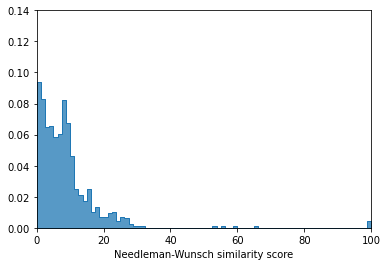

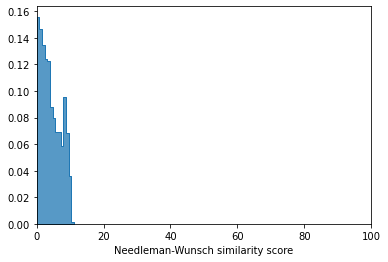

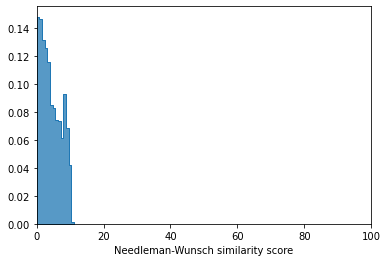

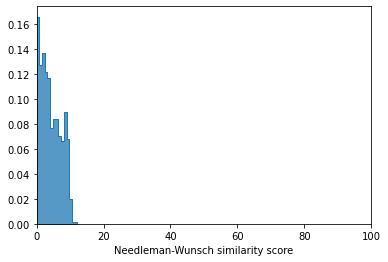

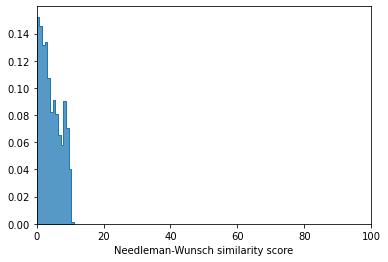

In [5]:
for i in range(5):
    needle_scores = []
    for p1 in range(1, len(ds_len[i][0])+1):
        for p2 in range(1, len(ds_len[i][1])+1):
            with open(f'{data_path}needle_outputs/train-test/ds{i+1}_proteins_{p1}_{p2}.txt') as f:
                line = f.readlines()
                needle_scores.append(float(line[24].strip()[26:-2]))
    sns.histplot(needle_scores, element="step", stat="density", common_norm=False)
    plt.xlabel("Needleman-Wunsch similarity score")
    plt.ylabel("")
    plt.xlim([0,100])
    plt.savefig(f'{data_path}needle_outputs/train-test/images/ds{i+1}.png', dpi=300)
    plt.show()

Great! We have the correct datasets and we also finalised all the proteins. Now we will start filtering based on ligand properties we want.

### Analysis of ligands (Salt removal)

First we will remove all salts (disconnected components) from the ligands (salts = substrings connected with '.').

In [531]:
uprots = set(d1_tr_prots+d2_tr_prots+d3_tr_prots+d4_tr_prots+d5_tr_prots+d1_te_prots+d2_te_prots+d3_te_prots+d4_te_prots+d5_te_prots)
len(uprots)

1613

In [532]:
print('Train datasets details:')

d1_tr_ligs = []
d2_tr_ligs = []
d3_tr_ligs = []
d4_tr_ligs = []
d5_tr_ligs = []

with open(data_path+'train_dataset/train_4_org_1042_104/ligands_train_4_org_corrected') as f:
    for line in f:
        d1_tr_ligs.append(line.strip().replace(' ', ''))
print('Dataset 1 ligands count =', len(d1_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1000_112/ligands_train_4_org_corrected') as f:
    for line in f:
        d2_tr_ligs.append(line.strip().replace(' ', ''))
print('Dataset 2 ligands count =', len(d2_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1004_122/ligands_train_4_org_corrected') as f:
    for line in f:
        d3_tr_ligs.append(line.strip().replace(' ', ''))
print('Dataset 3 ligands count =', len(d3_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1002_103/ligands_train_4_org_corrected') as f:
    for line in f:
        d4_tr_ligs.append(line.strip().replace(' ', ''))
print('Dataset 4 ligands count =', len(d4_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1036_124/ligands_train_4_org_corrected') as f:
    for line in f:
        d5_tr_ligs.append(line.strip().replace(' ', ''))
print('Dataset 5 ligands count =', len(d5_tr_ligs))

Train datasets details:
Dataset 1 ligands count = 227093
Dataset 2 ligands count = 144000
Dataset 3 ligands count = 146060
Dataset 4 ligands count = 144885
Dataset 5 ligands count = 142687


In [533]:
print('Test datasets details:')

d1_te_ligs = []
d2_te_ligs = []
d3_te_ligs = []
d4_te_ligs = []
d5_te_ligs = []

with open(data_path+'test_dataset/test_4_org_1042_104/ligands_test_4_org_corrected') as f:
    for line in f:
        d1_te_ligs.append(line.strip().replace(' ', ''))
print('Dataset 1 ligands count =', len(d1_te_ligs))

with open(data_path+'test_dataset/test_4_org_1000_112/ligands_test_4_org_corrected') as f:
    for line in f:
        d2_te_ligs.append(line.strip().replace(' ', ''))
print('Dataset 2 ligands count =', len(d2_te_ligs))

with open(data_path+'test_dataset/test_4_org_1004_122/ligands_test_4_org_corrected') as f:
    for line in f:
        d3_te_ligs.append(line.strip().replace(' ', ''))
print('Dataset 3 ligands count =', len(d3_te_ligs))

with open(data_path+'test_dataset/test_4_org_1002_103/ligands_test_4_org_corrected') as f:
    for line in f:
        d4_te_ligs.append(line.strip().replace(' ', ''))
print('Dataset 4 ligands count =', len(d4_te_ligs))

with open(data_path+'test_dataset/test_4_org_1036_124/ligands_test_4_org_corrected') as f:
    for line in f:
        d5_te_ligs.append(line.strip().replace(' ', ''))
print('Dataset 5 ligands count =', len(d5_te_ligs))

Test datasets details:
Dataset 1 ligands count = 11049
Dataset 2 ligands count = 16200
Dataset 3 ligands count = 26640
Dataset 4 ligands count = 16015
Dataset 5 ligands count = 25875


In [534]:
# Saving train datasets

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_ligands.txt', 'w+') as f:
    for lig in d1_tr_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 1 train saved.')

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.txt', 'w+') as f:
    for lig in d2_tr_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 2 train saved.')

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_ligands.txt', 'w+') as f:
    for lig in d3_tr_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 3 train saved.')

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_ligands.txt', 'w+') as f:
    for lig in d4_tr_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 4 train saved.')

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_ligands.txt', 'w+') as f:
    for lig in d5_tr_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 5 train saved.')

Dataset 1 train saved.
Dataset 2 train saved.
Dataset 3 train saved.
Dataset 4 train saved.
Dataset 5 train saved.


In [535]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_ligands.txt', 'w+') as f:
    for lig in d1_te_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 1 test saved.')

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_ligands.txt', 'w+') as f:
    for lig in d2_te_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 2 test saved.')

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_ligands.txt', 'w+') as f:
    for lig in d3_te_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 3 test saved.')

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_ligands.txt', 'w+') as f:
    for lig in d4_te_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 4 test saved.')

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_ligands.txt', 'w+') as f:
    for lig in d5_te_ligs:
        f.write([b for b in lig.split('.') if len(b) == max([len(bs) for bs in lig.split('.')])][0]+'\n')
print('Dataset 5 test saved.')

Dataset 1 test saved.
Dataset 2 test saved.
Dataset 3 test saved.
Dataset 4 test saved.
Dataset 5 test saved.


### Analysis of ligands (Removing molecules with > 100 atoms)

In [536]:
print('Train datasets details:')

d1_tr_ligs = []
d2_tr_ligs = []
d3_tr_ligs = []
d4_tr_ligs = []
d5_tr_ligs = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_ligands.txt') as f:
    for line in f:
        d1_tr_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.txt') as f:
    for line in f:
        d2_tr_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_ligands.txt') as f:
    for line in f:
        d3_tr_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_ligands.txt') as f:
    for line in f:
        d4_tr_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_ligands.txt') as f:
    for line in f:
        d5_tr_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_tr_ligs))

Train datasets details:
Dataset 1 ligands count = 227093
Dataset 2 ligands count = 144000
Dataset 3 ligands count = 146060
Dataset 4 ligands count = 144885
Dataset 5 ligands count = 142687


In [537]:
print('Test datasets details:')

d1_te_ligs = []
d2_te_ligs = []
d3_te_ligs = []
d4_te_ligs = []
d5_te_ligs = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_ligands.txt') as f:
    for line in f:
        d1_te_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_te_ligs))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_ligands.txt') as f:
    for line in f:
        d2_te_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_te_ligs))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_ligands.txt') as f:
    for line in f:
        d3_te_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_te_ligs))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_ligands.txt') as f:
    for line in f:
        d4_te_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_te_ligs))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_ligands.txt') as f:
    for line in f:
        d5_te_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_te_ligs))

Test datasets details:
Dataset 1 ligands count = 11049
Dataset 2 ligands count = 16200
Dataset 3 ligands count = 26640
Dataset 4 ligands count = 16015
Dataset 5 ligands count = 25875


#### Importing RDKit for extracting and filtering based on molecule information

In [538]:
import os
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
    import rdkit
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem import rdmolfiles
    from rdkit.Chem.Draw import IPythonConsole
    IPythonConsole.ipython_useSVG=True
except ImportError:
    print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
    exit()

In [539]:
def filter_by_atom_count(smiles):
    count = 0
    filtered = []
    for s in smiles:
        mol = Chem.MolFromSmiles(s)
        if len(mol.GetAtoms()) <= 100:
            count+=1
            filtered.append(s)
    print('No. of molecules with <= 100 atoms =', count)
    return filtered

In [540]:
d1_tr_ligs = filter_by_atom_count(d1_tr_ligs)
d2_tr_ligs = filter_by_atom_count(d2_tr_ligs)
d3_tr_ligs = filter_by_atom_count(d3_tr_ligs)
d4_tr_ligs = filter_by_atom_count(d4_tr_ligs)
d5_tr_ligs = filter_by_atom_count(d5_tr_ligs)

d1_te_ligs = filter_by_atom_count(d1_te_ligs)
d2_te_ligs = filter_by_atom_count(d2_te_ligs)
d3_te_ligs = filter_by_atom_count(d3_te_ligs)
d4_te_ligs = filter_by_atom_count(d4_te_ligs)
d5_te_ligs = filter_by_atom_count(d5_te_ligs)

No. of molecules with <= 100 = 227093
No. of molecules with <= 100 = 144000
No. of molecules with <= 100 = 146060
No. of molecules with <= 100 = 144885
No. of molecules with <= 100 = 142687
No. of molecules with <= 100 = 11049
No. of molecules with <= 100 = 16200
No. of molecules with <= 100 = 26640
No. of molecules with <= 100 = 16015
No. of molecules with <= 100 = 25875


In [541]:
# Saving train datasets

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_ligands.txt', 'w+') as f:
    for lig in d1_tr_ligs:
        f.write(lig+'\n')
print('Dataset 1 train saved.')

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.txt', 'w+') as f:
    for lig in d2_tr_ligs:
        f.write(lig+'\n')
print('Dataset 2 train saved.')

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_ligands.txt', 'w+') as f:
    for lig in d3_tr_ligs:
        f.write(lig+'\n')
print('Dataset 3 train saved.')

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_ligands.txt', 'w+') as f:
    for lig in d4_tr_ligs:
        f.write(lig+'\n')
print('Dataset 4 train saved.')

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_ligands.txt', 'w+') as f:
    for lig in d5_tr_ligs:
        f.write(lig+'\n')
print('Dataset 5 train saved.')

Dataset 1 train saved.
Dataset 2 train saved.
Dataset 3 train saved.
Dataset 4 train saved.
Dataset 5 train saved.


In [542]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_ligands.txt', 'w+') as f:
    for lig in d1_te_ligs:
        f.write(lig+'\n')
print('Dataset 1 test saved.')

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_ligands.txt', 'w+') as f:
    for lig in d2_te_ligs:
        f.write(lig+'\n')
print('Dataset 2 test saved.')

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_ligands.txt', 'w+') as f:
    for lig in d3_te_ligs:
        f.write(lig+'\n')
print('Dataset 3 test saved.')

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_ligands.txt', 'w+') as f:
    for lig in d4_te_ligs:
        f.write(lig+'\n')
print('Dataset 4 test saved.')

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_ligands.txt', 'w+') as f:
    for lig in d5_te_ligs:
        f.write(lig+'\n')
print('Dataset 5 test saved.')

Dataset 1 test saved.
Dataset 2 test saved.
Dataset 3 test saved.
Dataset 4 test saved.
Dataset 5 test saved.


In [543]:
print('Train datasets details:')

d1_tr_ligs = []
d2_tr_ligs = []
d3_tr_ligs = []
d4_tr_ligs = []
d5_tr_ligs = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_ligands.txt') as f:
    for line in f:
        d1_tr_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.txt') as f:
    for line in f:
        d2_tr_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_ligands.txt') as f:
    for line in f:
        d3_tr_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_ligands.txt') as f:
    for line in f:
        d4_tr_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_ligands.txt') as f:
    for line in f:
        d5_tr_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_tr_ligs))

Train datasets details:
Dataset 1 ligands count = 227093
Dataset 2 ligands count = 144000
Dataset 3 ligands count = 146060
Dataset 4 ligands count = 144885
Dataset 5 ligands count = 142687


In [544]:
print('Test datasets details:')

d1_te_ligs = []
d2_te_ligs = []
d3_te_ligs = []
d4_te_ligs = []
d5_te_ligs = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_ligands.txt') as f:
    for line in f:
        d1_te_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_te_ligs))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_ligands.txt') as f:
    for line in f:
        d2_te_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_te_ligs))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_ligands.txt') as f:
    for line in f:
        d3_te_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_te_ligs))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_ligands.txt') as f:
    for line in f:
        d4_te_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_te_ligs))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_ligands.txt') as f:
    for line in f:
        d5_te_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_te_ligs))

Test datasets details:
Dataset 1 ligands count = 11049
Dataset 2 ligands count = 16200
Dataset 3 ligands count = 26640
Dataset 4 ligands count = 16015
Dataset 5 ligands count = 25875


Awesome! We got our ligand datasets. Now we will store all the unique atom types.

In [548]:
def give_atom_types(smiles):
    atom_types = []
    for s in smiles:
        mol = Chem.MolFromSmiles(s)
        for atom in mol.GetAtoms():
            atom_types.append(str(atom.GetSymbol())+','+str(atom.GetFormalCharge())+','+str(atom.GetNumExplicitHs()))
    return list(set(atom_types))

In [549]:
atom_types = give_atom_types(d1_tr_ligs)
atom_types += give_atom_types(d2_tr_ligs)
atom_types += give_atom_types(d3_tr_ligs)
atom_types += give_atom_types(d4_tr_ligs)
atom_types += give_atom_types(d5_tr_ligs)

atom_types += give_atom_types(d1_te_ligs)
atom_types += give_atom_types(d2_te_ligs)
atom_types += give_atom_types(d3_te_ligs)
atom_types += give_atom_types(d4_te_ligs)
atom_types += give_atom_types(d5_te_ligs)

atom_types = list(set(atom_types))
len(atom_types)

49

Cool! Now we remove the BindingDB ligands from the ChEMBL dataset to avoid duplicacy.

In [565]:
chembl_path = '/home/iit/DGGNP/data/chembl/'

In [566]:
import pandas as pd

In [567]:
chembl_df = pd.read_csv(chembl_path+'chembl.csv', delimiter=';')
chembl_df

ChEMBL ID                 Name  \
0        CHEMBL1902090                  NaN   
1        CHEMBL1802565                  NaN   
2        CHEMBL1531434                  NaN   
3        CHEMBL3304157                  NaN   
4         CHEMBL592102                  NaN   
...                ...                  ...   
1207355    CHEMBL33986          BUTORPHANOL   
1207356      CHEMBL165          RESVERATROL   
1207357  CHEMBL3989559  PANTOPRAZOLE SODIUM   
1207358  CHEMBL1213420             DROXICAM   
1207359   CHEMBL283120             AXL-1717   

                                                  Synonyms            Type  \
0                                                      NaN  Small molecule   
1                                                      NaN  Small molecule   
2                                                      NaN  Small molecule   
3                                                      NaN  Small molecule   
4                                              SJ000185809  Small molecule   
...                                                    ...             ...   
1207355                           BUTORPHANOL|LEVO-BC-2627  Small molecule   
1207356  (E)-resveratrol|3,5,4'-Trihydroxy-trans-stilbe...  Small molecule   
1207357  PANTOPRAZOLE SODIUM|PANTOPRAZOLE SODIUM HYDRAT...  Small molecule   
1207358                                           DROXICAM  Small molecule   
1207359  AXL-1717|NSC-36407|PICROPODOPHYLLIN|PODOPHYLLO...  Small molecule   

         Max Phase  Molecular Weight  Targets  Bioactivities  AlogP  \
0                0            337.42      2.0            2.0   2.10   
1                0            336.34     17.0           26.0   2.12   
2                0            440.52      4.0            4.0   4.48   
3                0            148.21      NaN            NaN   1.09   
4                0            306.48      1.0            2.0   2.48   
...            ...               ...      ...            ...    ...   
1207355          4            327.47     24.0          108.0   3.37   
1207356          3            228.25    446.0         2528.0   2.97   
1207357          4            423.37      2.0            2.0   2.88   
1207358          0            357.35     21.0           42.0   0.99   
1207359          2            414.41    293.0          307.0   2.41   

         Polar Surface Area  ...  Structure Type  Inorganic Flag  Heavy Atoms  \
0                     62.30  ...             MOL              -1           25   
1                     75.71  ...             MOL              -1           23   
2                     80.49  ...             MOL              -1           32   
3                     17.29  ...             MOL              -1           11   
4                     30.54  ...             MOL              -1           21   
...                     ...  ...             ...             ...          ...   
1207355               43.70  ...             MOL               0           24   
1207356               60.69  ...             MOL               0           17   
1207357               86.33  ...             MOL               0           26   
1207358              102.48  ...             MOL               0           25   
1207359               92.68  ...             MOL               0           30   

         HBA (Lipinski) HBD (Lipinski)  #RO5 Violations (Lipinski)  \
0                     5              1                           0   
1                     6              1                           0   
2                     7              1                           0   
3                     2              0                           0   
4                     4              2                           0   
...                 ...            ...                         ...   
1207355               3              2                           0   
1207356               3              3                           0   
1207357               7              1                 

Nice! We have the ChEMBL dataset based on the physiochemical filters as suggested by Grechishnikova. We now further remove molecules with > 100 atoms and perform salt removal. We then remove the bindingdb ligands from the chembl molecules then store the chembl molecules.

In [571]:
chembl_mols = []

for s in chembl_df['Smiles']:
    try:
        mol = Chem.MolFromSmiles(s)
        if len(mol.GetAtoms()) <= 100:
            chembl_mols.append([b for b in s.split('.') if len(b) == max([len(bs) for bs in s.split('.')])][0])
    except:
        continue
        
len(chembl_mols)

RDKit ERROR: [04:08:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 10 11 15 16 17 19 20 21
[04:08:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 10 11 15 16 17 19 20 21

RDKit ERROR: 
RDKit WARNING: [04:09:31] WARNING: not removing hydrogen atom without neighbors
[04:09:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [04:10:17] WARNING: not removing hydrogen atom without neighbors
[04:10:17] WARNING: not removing hydrogen atom without neighbors


1207359

In [572]:
bindingdb_ligs = list(set(d1_tr_ligs+d2_tr_ligs+d3_tr_ligs+d4_tr_ligs+d5_tr_ligs+d1_te_ligs+d2_te_ligs+d3_te_ligs+d4_te_ligs+d5_te_ligs))
len(bindingdb_ligs)

154899

In [573]:
with open(chembl_path+'chembl.txt', 'w+') as f:
    for s in list(set(chembl_mols) - set(bindingdb_ligs)):
        f.write(s+'\n')

Superb! We will now compute the atom types for the chembl molecules and combine them with bindingdb atom types and then store them.

In [574]:
chembl_mols = []

with open(chembl_path+'chembl.txt') as f:
    for line in f:
        chembl_mols.append(line.strip())

In [ ]:
ch_atom_types = give_atom_types(chembl_mols)

In [577]:
print(len(ch_atom_types))
atom_types = list(set(ch_atom_types+atom_types))
len(atom_types)

45


65

In [578]:
# Store atom types
with open('/home/iit/DGGNP/data/atom_types.txt', 'w+') as f:
    for at in atom_types:
        f.write(at+'\n')

## Importing pretrained protein embedding module

In [14]:
print('Train datasets details:')

d1_tr_uprots = []
d2_tr_uprots = []
d3_tr_uprots = []
d4_tr_uprots = []
d5_tr_uprots = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_proteins.txt') as f:
    for line in f:
        d1_tr_uprots.append(line.strip().replace(' ', ''))
print('Dataset 1 proteins count =', len(set(d1_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_proteins.txt') as f:
    for line in f:
        d2_tr_uprots.append(line.strip().replace(' ', ''))
print('Dataset 2 proteins count =', len(set(d2_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_proteins.txt') as f:
    for line in f:
        d3_tr_uprots.append(line.strip().replace(' ', ''))
print('Dataset 3 proteins count =', len(set(d3_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_proteins.txt') as f:
    for line in f:
        d4_tr_uprots.append(line.strip().replace(' ', ''))
print('Dataset 4 proteins count =', len(set(d4_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_proteins.txt') as f:
    for line in f:
        d5_tr_uprots.append(line.strip().replace(' ', ''))
print('Dataset 5 proteins count =', len(set(d5_tr_uprots)))

Train datasets details:
Dataset 1 proteins count = 1042
Dataset 2 proteins count = 1000
Dataset 3 proteins count = 1004
Dataset 4 proteins count = 1002
Dataset 5 proteins count = 1036


In [15]:
print('Test datasets details:')

d1_te_uprots = []
d2_te_uprots = []
d3_te_uprots = []
d4_te_uprots = []
d5_te_uprots = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins.txt') as f:
    for line in f:
        d1_te_uprots.append(line.strip().replace(' ', ''))
print('Dataset 1 proteins count =', len(set(d1_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins.txt') as f:
    for line in f:
        d2_te_uprots.append(line.strip().replace(' ', ''))
print('Dataset 2 proteins count =', len(set(d2_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins.txt') as f:
    for line in f:
        d3_te_uprots.append(line.strip().replace(' ', ''))
print('Dataset 3 proteins count =', len(set(d3_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins.txt') as f:
    for line in f:
        d4_te_uprots.append(line.strip().replace(' ', ''))
print('Dataset 4 proteins count =', len(set(d4_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins.txt') as f:
    for line in f:
        d5_te_uprots.append(line.strip().replace(' ', ''))
print('Dataset 5 proteins count =', len(set(d5_te_uprots)))

Test datasets details:
Dataset 1 proteins count = 104
Dataset 2 proteins count = 112
Dataset 3 proteins count = 122
Dataset 4 proteins count = 103
Dataset 5 proteins count = 124


In [16]:
# Saving train datasets

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d1_tr_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d2_tr_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d3_tr_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d4_tr_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d5_tr_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')

In [17]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d1_te_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d2_te_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d3_te_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d4_te_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')
        
with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins_bepler.fa', 'w+') as f:
    for pi, prot in enumerate(d5_te_uprots):
        f.write(f'>p{pi+1}\n{prot}\n')

### Obtaining protein embeddings using pretrained ProSE model from Bepler et al.

In [21]:
def give_embeddings_bepler(filename):
    os.system(f'python prose/embed_sequences.py --pool avg -o {filename}_embeddings_bepler.h5 {filename}_proteins_bepler.fa')
    embeddings = []
    with h5py.File(filename+'_embeddings_bepler.h5', "r") as f:
        for key in f.keys():
            embeddings.append(list(f[key]))
    return embeddings

In [22]:
d1_tr_embeds = give_embeddings_bepler(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique')
d2_tr_embeds = give_embeddings_bepler(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique')
d3_tr_embeds = give_embeddings_bepler(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique')
d4_tr_embeds = give_embeddings_bepler(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique')
d5_tr_embeds = give_embeddings_bepler(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique')

d1_te_embeds = give_embeddings_bepler(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique')
d2_te_embeds = give_embeddings_bepler(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique')
d3_te_embeds = give_embeddings_bepler(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique')
d4_te_embeds = give_embeddings_bepler(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique')
d5_te_embeds = give_embeddings_bepler(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique')

In [23]:
len(d1_tr_embeds[100])

6165

In [24]:
# Saving train datasets

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d1_tr_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d2_tr_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d3_tr_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d4_tr_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d5_tr_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')

In [25]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d1_te_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d2_te_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d3_te_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d4_te_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')
        
with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_embeddings_bepler.txt', 'w+') as f:
    for embed in d5_te_embeds:
        for e in embed:
            f.write(str(e)+'\t')
        f.write('\n')

Hurrah! We have stored the pretrained protein embeddings. Now we will construct the final datasets for all three models: DGGNP, Grechishnikova, Li et al.

## Finalising all five datasets

In [2]:
print('Train datasets details:')

d1_tr_uprots = []
d2_tr_uprots = []
d3_tr_uprots = []
d4_tr_uprots = []
d5_tr_uprots = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_unique_proteins.txt') as f:
    for line in f:
        d1_tr_uprots.append(line)
print('Dataset 1 proteins count =', len(set(d1_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_unique_proteins.txt') as f:
    for line in f:
        d2_tr_uprots.append(line)
print('Dataset 2 proteins count =', len(set(d2_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_unique_proteins.txt') as f:
    for line in f:
        d3_tr_uprots.append(line)
print('Dataset 3 proteins count =', len(set(d3_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_unique_proteins.txt') as f:
    for line in f:
        d4_tr_uprots.append(line)
print('Dataset 4 proteins count =', len(set(d4_tr_uprots)))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_unique_proteins.txt') as f:
    for line in f:
        d5_tr_uprots.append(line)
print('Dataset 5 proteins count =', len(set(d5_tr_uprots)))

Train datasets details:
Dataset 1 proteins count = 1042
Dataset 2 proteins count = 1000
Dataset 3 proteins count = 1004
Dataset 4 proteins count = 1002
Dataset 5 proteins count = 1036


In [3]:
print('Validation datasets details:')

d1_va_uprots = []
d2_va_uprots = []
d3_va_uprots = []
d4_va_uprots = []
d5_va_uprots = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_va_unique_proteins.txt') as f:
    for line in f:
        d1_va_uprots.append(line)
print('Dataset 1 proteins count =', len(set(d1_va_uprots)))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_va_unique_proteins.txt') as f:
    for line in f:
        d2_va_uprots.append(line)
print('Dataset 2 proteins count =', len(set(d2_va_uprots)))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_va_unique_proteins.txt') as f:
    for line in f:
        d3_va_uprots.append(line)
print('Dataset 3 proteins count =', len(set(d3_va_uprots)))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_va_unique_proteins.txt') as f:
    for line in f:
        d4_va_uprots.append(line)
print('Dataset 4 proteins count =', len(set(d4_va_uprots)))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_va_unique_proteins.txt') as f:
    for line in f:
        d5_va_uprots.append(line)
print('Dataset 5 proteins count =', len(set(d5_va_uprots)))

Validation datasets details:
Dataset 1 proteins count = 52
Dataset 2 proteins count = 56
Dataset 3 proteins count = 61
Dataset 4 proteins count = 51
Dataset 5 proteins count = 62


In [4]:
print('Test datasets details:')

d1_te_uprots = []
d2_te_uprots = []
d3_te_uprots = []
d4_te_uprots = []
d5_te_uprots = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins.txt') as f:
    for line in f:
        d1_te_uprots.append(line)
print('Dataset 1 proteins count =', len(set(d1_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins.txt') as f:
    for line in f:
        d2_te_uprots.append(line)
print('Dataset 2 proteins count =', len(set(d2_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins.txt') as f:
    for line in f:
        d3_te_uprots.append(line)
print('Dataset 3 proteins count =', len(set(d3_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins.txt') as f:
    for line in f:
        d4_te_uprots.append(line)
print('Dataset 4 proteins count =', len(set(d4_te_uprots)))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins.txt') as f:
    for line in f:
        d5_te_uprots.append(line)
print('Dataset 5 proteins count =', len(set(d5_te_uprots)))

Test datasets details:
Dataset 1 proteins count = 52
Dataset 2 proteins count = 56
Dataset 3 proteins count = 61
Dataset 4 proteins count = 52
Dataset 5 proteins count = 62


In [14]:
random.seed(17)
d1_va_uprots = random.sample(d1_te_uprots, len(d1_te_uprots)//2)
d2_va_uprots = random.sample(d2_te_uprots, len(d2_te_uprots)//2)
d3_va_uprots = random.sample(d3_te_uprots, len(d3_te_uprots)//2)
d4_va_uprots = random.sample(d4_te_uprots, len(d4_te_uprots)//2)
d5_va_uprots = random.sample(d5_te_uprots, len(d5_te_uprots)//2)

print(len(d1_va_uprots))
print(len(d2_va_uprots))
print(len(d3_va_uprots))
print(len(d4_va_uprots))
print(len(d5_va_uprots))

52
56
61
51
62


In [15]:
d1_te_uprots = list(set(d1_te_uprots)-set(d1_va_uprots))
d2_te_uprots = list(set(d2_te_uprots)-set(d2_va_uprots))
d3_te_uprots = list(set(d3_te_uprots)-set(d3_va_uprots))
d4_te_uprots = list(set(d4_te_uprots)-set(d4_va_uprots))
d5_te_uprots = list(set(d5_te_uprots)-set(d5_va_uprots))

print(len(d1_te_uprots))
print(len(d2_te_uprots))
print(len(d3_te_uprots))
print(len(d4_te_uprots))
print(len(d5_te_uprots))

52
56
61
52
62


In [17]:
# Saving validation datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_va_unique_proteins.txt', 'w+') as f:
    for prot in d1_va_uprots:
        f.write(prot)
print('Dataset 1 test saved.')

with open(data_path+'test_dataset/test_4_org_1000_112/d2_va_unique_proteins.txt', 'w+') as f:
    for prot in d2_va_uprots:
        f.write(prot)
print('Dataset 2 test saved.')

with open(data_path+'test_dataset/test_4_org_1004_122/d3_va_unique_proteins.txt', 'w+') as f:
    for prot in d3_va_uprots:
        f.write(prot)
print('Dataset 3 test saved.')

with open(data_path+'test_dataset/test_4_org_1002_103/d4_va_unique_proteins.txt', 'w+') as f:
    for prot in d4_va_uprots:
        f.write(prot)
print('Dataset 4 test saved.')

with open(data_path+'test_dataset/test_4_org_1036_124/d5_va_unique_proteins.txt', 'w+') as f:
    for prot in d5_va_uprots:
        f.write(prot)
print('Dataset 5 test saved.')

Dataset 1 test saved.
Dataset 2 test saved.
Dataset 3 test saved.
Dataset 4 test saved.
Dataset 5 test saved.


In [18]:
# Saving test datasets

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_unique_proteins.txt', 'w+') as f:
    for prot in d1_te_uprots:
        f.write(prot)
print('Dataset 1 test saved.')

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_unique_proteins.txt', 'w+') as f:
    for prot in d2_te_uprots:
        f.write(prot)
print('Dataset 2 test saved.')

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_proteins.txt', 'w+') as f:
    for prot in d3_te_uprots:
        f.write(prot)
print('Dataset 3 test saved.')

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_unique_proteins.txt', 'w+') as f:
    for prot in d4_te_uprots:
        f.write(prot)
print('Dataset 4 test saved.')

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_unique_proteins.txt', 'w+') as f:
    for prot in d5_te_uprots:
        f.write(prot)
print('Dataset 5 test saved.')

Dataset 1 test saved.
Dataset 2 test saved.
Dataset 3 test saved.
Dataset 4 test saved.
Dataset 5 test saved.


### Grechishnikova

In [32]:
print('Train datasets details:')

d1_tr_prots = []
d2_tr_prots = []
d3_tr_prots = []
d4_tr_prots = []
d5_tr_prots = []

with open(data_path+'train_dataset/train_4_org_1042_104/proteins_train_4_org_corrected') as f:
    for line in f:
        d1_tr_prots.append(line)
print('Dataset 1 proteins count =', len(set(d1_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1000_112/proteins_train_4_org_corrected') as f:
    for line in f:
        d2_tr_prots.append(line)
print('Dataset 2 proteins count =', len(set(d2_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1004_122/proteins_train_4_org_corrected') as f:
    for line in f:
        d3_tr_prots.append(line)
print('Dataset 3 proteins count =', len(set(d3_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1002_103/proteins_train_4_org_corrected') as f:
    for line in f:
        d4_tr_prots.append(line)
print('Dataset 4 proteins count =', len(set(d4_tr_prots)))

with open(data_path+'train_dataset/train_4_org_1036_124/proteins_train_4_org_corrected') as f:
    for line in f:
        d5_tr_prots.append(line)
print('Dataset 5 proteins count =', len(set(d5_tr_prots)))

Train datasets details:
Dataset 1 proteins count = 1514
Dataset 2 proteins count = 1000
Dataset 3 proteins count = 1004
Dataset 4 proteins count = 1002
Dataset 5 proteins count = 1036


In [33]:
print('Test datasets details:')

d1_te_prots = []
d2_te_prots = []
d3_te_prots = []
d4_te_prots = []
d5_te_prots = []

with open(data_path+'test_dataset/test_4_org_1042_104/proteins_test_4_org_corrected') as f:
    for line in f:
        d1_te_prots.append(line)
print('Dataset 1 proteins count =', len(set(d1_te_prots)))

with open(data_path+'test_dataset/test_4_org_1000_112/proteins_test_4_org_corrected') as f:
    for line in f:
        d2_te_prots.append(line)
print('Dataset 2 proteins count =', len(set(d2_te_prots)))

with open(data_path+'test_dataset/test_4_org_1004_122/proteins_test_4_org_corrected') as f:
    for line in f:
        d3_te_prots.append(line)
print('Dataset 3 proteins count =', len(set(d3_te_prots)))

with open(data_path+'test_dataset/test_4_org_1002_103/proteins_test_4_org_corrected') as f:
    for line in f:
        d4_te_prots.append(line)
print('Dataset 4 proteins count =', len(set(d4_te_prots)))

with open(data_path+'test_dataset/test_4_org_1036_124/proteins_test_4_org_corrected') as f:
    for line in f:
        d5_te_prots.append(line)
print('Dataset 5 proteins count =', len(set(d5_te_prots)))

Test datasets details:
Dataset 1 proteins count = 99
Dataset 2 proteins count = 112
Dataset 3 proteins count = 122
Dataset 4 proteins count = 103
Dataset 5 proteins count = 124


In [34]:
print('Train datasets details:')

d1_tr_ligs = []
d2_tr_ligs = []
d3_tr_ligs = []
d4_tr_ligs = []
d5_tr_ligs = []

with open(data_path+'train_dataset/train_4_org_1042_104/d1_tr_ligands.txt') as f:
    for line in f:
        d1_tr_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.txt') as f:
    for line in f:
        d2_tr_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1004_122/d3_tr_ligands.txt') as f:
    for line in f:
        d3_tr_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1002_103/d4_tr_ligands.txt') as f:
    for line in f:
        d4_tr_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_tr_ligs))

with open(data_path+'train_dataset/train_4_org_1036_124/d5_tr_ligands.txt') as f:
    for line in f:
        d5_tr_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_tr_ligs))

Train datasets details:
Dataset 1 ligands count = 227093
Dataset 2 ligands count = 144000
Dataset 3 ligands count = 146060
Dataset 4 ligands count = 144885
Dataset 5 ligands count = 142687


In [35]:
print('Test datasets details:')

d1_te_ligs = []
d2_te_ligs = []
d3_te_ligs = []
d4_te_ligs = []
d5_te_ligs = []

with open(data_path+'test_dataset/test_4_org_1042_104/d1_te_ligands.txt') as f:
    for line in f:
        d1_te_ligs.append(line.strip())
print('Dataset 1 ligands count =', len(d1_te_ligs))

with open(data_path+'test_dataset/test_4_org_1000_112/d2_te_ligands.txt') as f:
    for line in f:
        d2_te_ligs.append(line.strip())
print('Dataset 2 ligands count =', len(d2_te_ligs))

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_ligands.txt') as f:
    for line in f:
        d3_te_ligs.append(line.strip())
print('Dataset 3 ligands count =', len(d3_te_ligs))

with open(data_path+'test_dataset/test_4_org_1002_103/d4_te_ligands.txt') as f:
    for line in f:
        d4_te_ligs.append(line.strip())
print('Dataset 4 ligands count =', len(d4_te_ligs))

with open(data_path+'test_dataset/test_4_org_1036_124/d5_te_ligands.txt') as f:
    for line in f:
        d5_te_ligs.append(line.strip())
print('Dataset 5 ligands count =', len(d5_te_ligs))

Test datasets details:
Dataset 1 ligands count = 11049
Dataset 2 ligands count = 16200
Dataset 3 ligands count = 26640
Dataset 4 ligands count = 16015
Dataset 5 ligands count = 25875


In [94]:
proteins = []
ligands = []

for uprot in d2_tr_uprots:
    for i, prot in enumerate(d2_tr_prots):
        if prot == uprot:
            proteins.append(prot)
            ligands.append(d2_tr_ligs[i][0]+d2_tr_ligs[i][1:-1].replace('', ' ')+d2_tr_ligs[i][-1])

In [95]:
len(proteins)

144000

In [96]:
len(ligands)

144000

In [97]:
len(set(proteins))

1000

In [98]:
len(set(ligands))

98623

In [99]:
with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_proteins.space_sep_seq', 'w+') as f:
    for prot in proteins:
        f.write(prot)

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.space_sep_seq', 'w+') as f:
    for lig in ligands:
        f.write(lig+'\n')

### DGGNP

In [3]:
proteins = []
ligands = []

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_proteins.space_sep_seq') as f:
    for line in f:
        proteins.append(line)

with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_ligands.space_sep_seq') as f:
    for line in f:
        ligands.append(line.strip().replace(' ', ''))

In [4]:
ligands[:5]

['CC(C)[C@@]1(NC(=O)[C@@H]2C=C3c4cccc5[nH]cc(c45)C[C@H]3N(C)C2)O[C@@]2(O)[C@@H]3CCCN3C(=O)[C@H](Cc3ccccc3)N2C1=O',
 'CC(C)[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](NC(=O)[C@@H]3C=C4c5cccc6[nH]cc(c56)C[C@H]4N(C)C3)(C(C)C)C(=O)N12',
 'Cc1cc(C(C)(C)C)c(O)c(C)c1CC1=NCCN1',
 'COc1ccc(OC)c2c1C[C@H]1c3cc4c(cc3CCN1C2)OCCO4',
 'c1ccc2c(c1)CC[C@@H](CNCCCNC1=NCCCN1)O2']

In [5]:
print(len(ligands))
print(len(proteins))

143999
143999


In [6]:
len(d2_tr_uprots)

1000

In [16]:
embeds = []

with open(data_path+'test_dataset/test_4_org_1004_122/d3_te_unique_embeddings_bepler.txt') as f:
    for line in f:
        embeds.append(line.strip()+'\n')

In [17]:
len(embeds)

122

In [18]:
embeds[0]

'0.049526587\t0.059723236\t0.06336489\t0.045884926\t0.032046616\t0.026219957\t0.083029866\t0.06627823\t0.017479971\t0.05316825\t0.0837582\t0.048798256\t0.029133286\t0.034959942\t0.060451567\t0.06700656\t0.05316825\t0.016023308\t0.04442826\t0.065549895\t0.0\t-0.010456162\t0.0043981513\t-0.00080700935\t-0.007824504\t0.00367096\t0.019091459\t0.0017276222\t0.0004047074\t0.010427528\t-0.02244869\t-1.0731376e-05\t-0.0017443298\t-0.006664998\t-0.0050237323\t-0.002016068\t0.004779578\t-0.006236076\t-0.00048549383\t0.007313065\t0.014877751\t0.019458313\t-0.010448196\t0.0057936604\t-0.0075272857\t0.0023880082\t-0.0059343604\t0.003345493\t-0.0019504047\t-0.0011363162\t0.009953182\t-0.002285296\t-0.009901801\t0.0065376046\t-0.012962394\t-0.0003986119\t0.008669935\t-0.011638604\t-0.0133178225\t0.008802515\t-0.01720615\t0.14934005\t-0.0030646373\t-0.0032184112\t0.013383852\t0.0012036528\t-0.0042290157\t-0.0035698982\t-0.0021759055\t0.030329945\t-0.0030415435\t-0.015867371\t-0.059656568\t0.0057562846

In [25]:
lines = []

for i, prot in enumerate(proteins):
    for j, uprot in enumerate(d3_va_uprots):
        if prot == uprot:
            lines.append(ligands[i]+'\t'+embeds[j])

In [26]:
lines[0]

'CC[C@@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccc(OC)cc2)NC(=O)[C@H](CCCCCC(=O)NO)NC(=O)[C@H]2CCCN2C1=O\t0.074268565\t0.047261816\t0.038259566\t0.04276069\t0.030007502\t0.03375844\t0.0660165\t0.08102026\t0.021755438\t0.04876219\t0.087771945\t0.06451613\t0.024006002\t0.048012003\t0.055513877\t0.062265567\t0.072018005\t0.0075018755\t0.024006002\t0.07051763\t0.0\t0.00019510796\t0.0022798812\t-0.006439944\t0.0065145413\t-0.005619952\t0.011387679\t0.0007645975\t0.00047743644\t-0.0044289045\t-0.013486193\t-0.00522932\t0.00053310965\t-0.0059831473\t-0.0077066044\t0.0071891546\t0.0038268494\t-0.00015578294\t0.0022918181\t-0.0032228848\t0.011042822\t0.009140451\t-0.0017111398\t0.010189879\t-0.0022251587\t-0.0053660334\t-0.0071995743\t0.005553669\t-0.009118239\t-0.0011123187\t0.0078124544\t-0.0017044875\t-0.01453851\t-0.0031508878\t-0.01188323\t-0.001664055\t0.010379722\t-0.007953897\t0.0013447163\t0.007913301\t-0.01021275\t0.093647696\t-0.0020973359\t-0.004897033\t0.0024959815\t-0.002351617\t-0.0035447387

In [27]:
len(lines)

9273

In [28]:
with open(data_path+'test_dataset/test_4_org_1004_122/d3_va_dggnp.txt', 'w+') as f:
    for line in lines:
        f.write(line)

In [29]:
import pandas as pd
pd.read_csv(data_path+'test_dataset/test_4_org_1004_122/d3_va_dggnp.txt', delimiter='\t', header=None)

0         1         2     \
0     CC[C@@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccc(OC)cc2)N...  0.074269  0.047262   
1     CC[C@@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccc(OC)cc2)N...  0.074269  0.047262   
2     CC[C@@H](C)[C@@H]1NC(=O)[C@@H](Cc2ccc(OC)cc2)N...  0.074269  0.047262   
3              CC(=CC(C)C=CC(=O)NO)C(=O)c1ccc(N(C)C)cc1  0.074269  0.047262   
4     CC[C@H](O)[C@@H](C)[C@H]1O[C@@H]1C[C@H](C)/C=C...  0.074638  0.049505   
...                                                 ...       ...       ...   
9268  CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...  0.064000  0.043556   
9269  CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...  0.064000  0.043556   
9270  CC(C)N(C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O...  0.064000  0.043556   
9271  Nc1ncnc2c1c(Br)cn2[C@@H]1O[C@H](CSCC[C@H](N)C(...  0.064000  0.043556   
9272  Nc1ncnc2c1ncn2[C@@H]1O[C@H](CN(CCI)CCC[C@H](N)...  0.064000  0.043556   

          3         4         5         6         7         8         9     \
0     0.038260  0.042761  0.030008  0.033758  0.066017  0.081020  0.021755   
1     0.038260  0.042761  0.030008  0.033758  0.066017  0.081020  0.021755   
2     0.038260  0.042761  0.030008  0.033758  0.066017  0.081020  0.021755   
3     0.038260  0.042761  0.030008  0.033758  0.066017  0.081020  0.021755   
4     0.049505  0.047982  0.011424  0.047982  0.063214  0.057121  0.034273   
...        ...       ...       ...       ...       ...       ...       ...   
9268  0.057778  0.048889  0.025778  0.040889  0.058667  0.047111  0.040000   
9269  0.057778  0.048889  0.025778  0.040889  0.058667  0.047111  0.040000   
9270  0.057778  0.048889  0.025778  0.040889  0.058667  0.047111  0.040000   
9271  0.057778  0.048889  0.025778  0.040889  0.058667  0.047111  0.040000   
9272  0.057778  0.048889  0.025778  0.040889  0.058667  0.047111  0.040000   

      ...      6156      6157      6158      6159      6160      6161  \
0     ... -0.003354 -0.145773  0.091484  0.005794  0.014001 -0.170883   
1     ... -0.003354 -0.145773  0.091484  0.005794  0.014001 -0.170883   
2     ... -0.003354 -0.145773  0.091484  0.005794  0.014001 -0.170883   
3     ... -0.003354 -0.145773  0.091484  0.005794  0.014001 -0.170883   
4     ... -0.030250 -0.183385  0.008834  0.020152  0.016794 -0.118058   
...   ...       ...       ...       ...       ...       ...       ...   
9268  ... -0.026993 -0.254352  0.031570  0.022564  0.010009 -0.158128   
9269  ... -0.026993 -0.254352  0.031570  0.022564  0.010009 -0.158128   
9270  ... -0.026993 -0.254352  0.031570  0.022564  0.010009 -0.158128   
9271  ... -0.026993 -0.254352  0.031570  0.022564  0.010009 -0.158128   
9272  ... -0.026993 -0.254352  0.031570  0.022564  0.010009 -0.158128   

          6162      6163      6164      6165  
0     0.095423  0.140204  0.062531 -0.114026  
1     0.095423  0.140204  0.062531 -0.114026  
2     0.095423  0.140204  0.062531 -0.114026  
3     0.095423  0.140204  0.062531 -0.114026  
4     0.098407  0.249031  0.083511 -0.002392  
...        ...       ...       ...       ...  
9268  0.014465 -0.102147  0.429162  0.166094  
9269  0.014465 -0.102147  0.429162  0.166094  
9270  0.014465 -0.102147  0.429162  0.166094  
9271  0.014465 -0.102147  0.429162  0.166094  
9272  0.014465 -0.102147  0.429162  0.166094  

[9273 rows x 6166 columns]

### Li et al.

In [8]:
import numpy as np

embeds = []

for emb in np.identity(1000, dtype=np.int):
    embstr = ''
    for e in emb:
        embstr += str(e)+'\t'
    embeds.append(embstr.strip()+'\n')
embeds

['1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\

In [9]:
len(embeds)

1000

In [10]:
embeds[0]

'1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t

In [11]:
lines = []

for i, prot in enumerate(proteins):
    for j, uprot in enumerate(d2_tr_uprots):
        if prot == uprot:
            lines.append(ligands[i]+'\t'+embeds[j])

In [12]:
lines[0]

'CC(C)[C@@]1(NC(=O)[C@@H]2C=C3c4cccc5[nH]cc(c45)C[C@H]3N(C)C2)O[C@@]2(O)[C@@H]3CCCN3C(=O)[C@H](Cc3ccccc3)N2C1=O\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\

In [13]:
len(lines)

143999

In [14]:
with open(data_path+'train_dataset/train_4_org_1000_112/d2_tr_li.txt', 'w+') as f:
    for line in lines:
        f.write(line)

In [15]:
import pandas as pd
pd.read_csv(data_path+'train_dataset/train_4_org_1000_112/d2_tr_li.txt', delimiter='\t', header=None)

0     1     2     3     \
0       CC(C)[C@@]1(NC(=O)[C@@H]2C=C3c4cccc5[nH]cc(c45...     1     0     0   
1       CC(C)[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](NC(=O...     1     0     0   
2                      Cc1cc(C(C)(C)C)c(O)c(C)c1CC1=NCCN1     1     0     0   
3            COc1ccc(OC)c2c1C[C@H]1c3cc4c(cc3CCN1C2)OCCO4     1     0     0   
4                  c1ccc2c(c1)CC[C@@H](CNCCCNC1=NCCCN1)O2     1     0     0   
...                                                   ...   ...   ...   ...   
143994         CC(C)(Nc1nnc(-c2c[nH]c3ncccc23)o1)c1ccccc1     0     0     0   
143995        C[C@H](Nc1nnc(-c2c[nH]c3ncccc23)o1)c1ccccc1     0     0     0   
143996            Fc1ccc(CNc2nnc(-c3c[nH]c4ncccc34)o2)cc1     0     0     0   
143997            Fc1cccc(CNc2nnc(-c3c[nH]c4ncccc34)o2)c1     0     0     0   
143998         CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1     0     0     0   

        4     5     6     7     8     9     ...  991   992   993   994   995   \
0          0     0     0     0     0     0  ...     0     0     0     0     0   
1          0     0     0     0     0     0  ...     0     0     0     0     0   
2          0     0     0     0     0     0  ...     0     0     0     0     0   
3          0     0     0     0     0     0  ...     0     0     0     0     0   
4          0     0     0     0     0     0  ...     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
143994     0     0     0     0     0     0  ...     0     0     0     0     0   
143995     0     0     0     0     0     0  ...     0     0     0     0     0   
143996     0     0     0     0     0     0  ...     0     0     0     0     0   
143997     0     0     0     0     0     0  ...     0     0     0     0     0   
143998     0     0     0     0     0     0  ...     0     0     0     0     0   

        996   997   998   999   1000  
0          0     0     0     0     0  
1          0     0     0     0     0  
2          0     0     0     0     0  
3          0     0     0     0     0  
4          0     0     0     0     0  
...      ...   ...   ...   ...   ...  
143994     0     0     0     0     1  
143995     0     0     0     0     1  
143996     0     0     0     0     1  
143997     0     0     0     0     1  
143998     0     0     0     0     1  

[143999 rows x 1001 columns]